<a href="https://colab.research.google.com/github/Shrenik811rp/Chest-xray-project/blob/master/Chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LOGISTIC REGRESSION USING CNN**

Install tensorflow==2.5.0 to get confusion matrix

In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

#!pip install tensorflow==2.5.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
zip_path = "/content/drive/MyDrive/xray_dataset/archive.zip"

!cp "{zip_path}" .

!unzip -q archive.zip

!rm archive.zip

In [5]:
dataset_folder = os.listdir("/content/drive/MyDrive/xray_dataset/chest_xray")

print(dataset_folder)
#print(np.__version__)


['__MACOSX', 'train', 'chest_xray', 'val', 'test']


In [48]:
'''
Folder paths
'''
train_folder = "/content/chest_xray/train"

test_folder = "/content/chest_xray/test"

val_folder ="/content/chest_xray/val"



In [7]:
#!pip install tensorflow==2.5.0
import tensorflow as tf

print(tf.__version__)


2.5.0


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , Activation,MaxPooling2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os

In [58]:
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
img_size = 150 # resize image

def get_data_train(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [61]:
train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


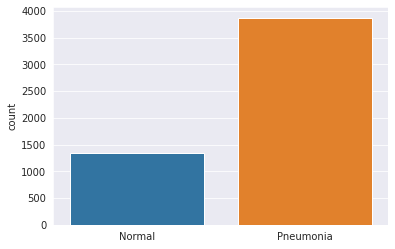

In [62]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)

Text(0.5, 1.0, 'PNEUMONIA')

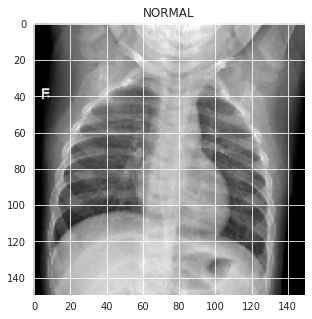

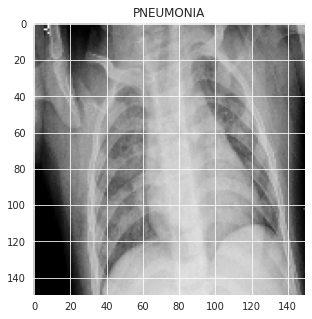

In [71]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [68]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [69]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [70]:
x_test.shape

(624, 150, 150)

In [72]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [73]:
x_test.shape

(624, 150, 150, 1)

In [79]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    epochs=5, 
                    validation_data=(x_val, y_val),
                    shuffle=True)
scores = model.evaluate(x_test, y_test)

model.save("cnn.model")

Epoch 1/5
163/163 [==============================] - 246s 2s/step - loss: 0.3102 - accuracy: 0.8666 - val_loss: 0.3858 - val_accuracy: 0.7500
Epoch 2/5
163/163 [==============================] - 248s 2s/step - loss: 0.1110 - accuracy: 0.9584 - val_loss: 0.7628 - val_accuracy: 0.6875
Epoch 3/5
163/163 [==============================] - 246s 2s/step - loss: 0.0863 - accuracy: 0.9686 - val_loss: 0.3583 - val_accuracy: 0.8125
Epoch 4/5
163/163 [==============================] - 250s 2s/step - loss: 0.0802 - accuracy: 0.9699 - val_loss: 0.1490 - val_accuracy: 0.9375
Epoch 5/5
20/20 [==============================] - 7s 364ms/step - loss: 1.3459 - accuracy: 0.7083
INFO:tensorflow:Assets written to: cnn.model/assets


In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
activation_4 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)       

In [81]:
print("Loss of the model is - " , scores[0])
print("Accuracy of the model is - " , scores[1]*100 , "%")

Loss of the model is -  1.3459126949310303
Accuracy of the model is -  70.83333134651184 %


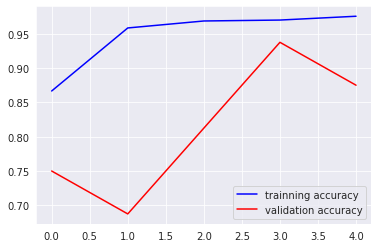

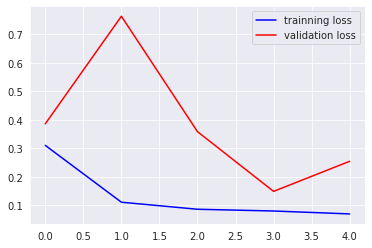

In [82]:

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [83]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [ ]:
tf.__version__  #use 2.5.0 version

In [92]:
print(classification_report(y_test,
                            predictions,
                            target_names = ['Pneumonia (Class 1)','Normal (Class 0)']))

                     precision    recall  f1-score   support

Pneumonia (Class 1)       0.98      0.23      0.37       234
   Normal (Class 0)       0.68      1.00      0.81       390

           accuracy                           0.71       624
          macro avg       0.83      0.61      0.59       624
       weighted avg       0.79      0.71      0.64       624



In [85]:
cm = confusion_matrix(y_test,predictions)
cm

array([[ 53, 181],
       [  1, 389]])

In [86]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

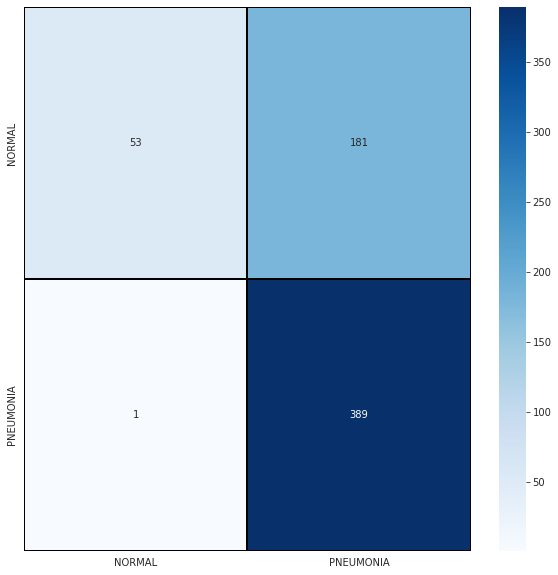

In [87]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black' ,
            linewidth = 1 ,
            annot = True,
            fmt='',
            xticklabels = labels,yticklabels = labels)

In [88]:
labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size,img_size))
    return new_array.reshape(-1,img_size,img_size, 1)

model = tf.keras.models.load_model("cnn.model") # load model

In [89]:
# extra pneumonia photo from google
prediction = model.predict([prepare("/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg")])
print(labels[int(prediction[0])])

PNEUMONIA


In [90]:
# extra pneumonia photo from google
prediction = model.predict([prepare("/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg")])
print(labels[int(prediction[0])])

NORMAL


#**SVM**

In [91]:

from tensorflow.keras.regularizers import l2

Text(0.5, 1.0, 'PNEUMONIA')

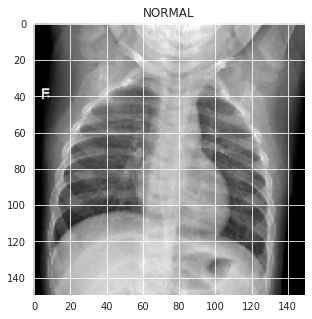

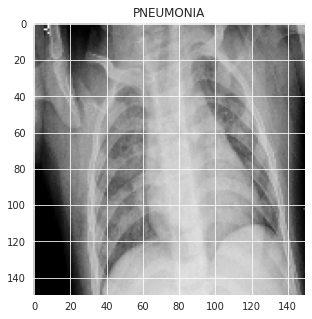

In [93]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [94]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [95]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [96]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [97]:
svm_model = Sequential()

svm_model.add(Conv2D(32, (3, 3), padding="same", input_shape=x_train.shape[1:]))
svm_model.add(Activation("relu"))
svm_model.add(MaxPooling2D(2, 2))
svm_model.add(Dropout(0.2))

svm_model.add(Conv2D(64, (3, 3), padding="same"))
svm_model.add(Activation("relu"))
svm_model.add(MaxPooling2D(2, 2))
svm_model.add(Dropout(0.2))

svm_model.add(Conv2D(128, (3, 3), padding="same"))
svm_model.add(Activation("relu"))
svm_model.add(MaxPooling2D(2, 2))
svm_model.add(Dropout(0.2))

svm_model.add(Flatten())
svm_model.add(Dense(128, activation="relu"))

svm_model.add(Dense(1))
svm_model.add(Activation("sigmoid"))

svm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = svm_model.fit(x_train, y_train,
                    epochs=3, 
                    validation_data=(x_val, y_val),
                    shuffle=True)
scores = svm_model.evaluate(x_test, y_test)
svm_model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                activation='linear'))

svm_model.compile(optimizer = "adam" , loss = 'hinge' , metrics = ['accuracy'])

svm_model.save("svm.model")

Epoch 1/3
163/163 [==============================] - 249s 2s/step - loss: 0.3292 - accuracy: 0.8668 - val_loss: 0.6899 - val_accuracy: 0.6875
Epoch 2/3
163/163 [==============================] - 246s 2s/step - loss: 0.1165 - accuracy: 0.9557 - val_loss: 0.3357 - val_accuracy: 0.8750
Epoch 3/3
20/20 [==============================] - 7s 374ms/step - loss: 0.7742 - accuracy: 0.7804
INFO:tensorflow:Assets written to: svm.model/assets


In [98]:
svm_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
activation_8 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 64)       

In [99]:
print("Loss of the model is - " , scores[0])
print("Accuracy of the model is - " , scores[1]*100 , "%")


Loss of the model is -  0.7742099761962891
Accuracy of the model is -  78.04487347602844 %


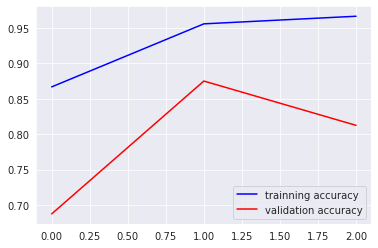

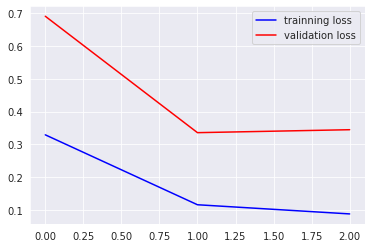

In [100]:

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [101]:
predictions = svm_model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [102]:
print(classification_report(y_test,
                            predictions,
                            target_names = ['Pneumonia (Class 1)','Normal (Class 0)']))

                     precision    recall  f1-score   support

Pneumonia (Class 1)       0.99      0.33      0.49       234
   Normal (Class 0)       0.71      1.00      0.83       390

           accuracy                           0.75       624
          macro avg       0.85      0.66      0.66       624
       weighted avg       0.82      0.75      0.70       624



In [103]:
cm = confusion_matrix(y_test,predictions)
cm

array([[ 77, 157],
       [  1, 389]])

In [104]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

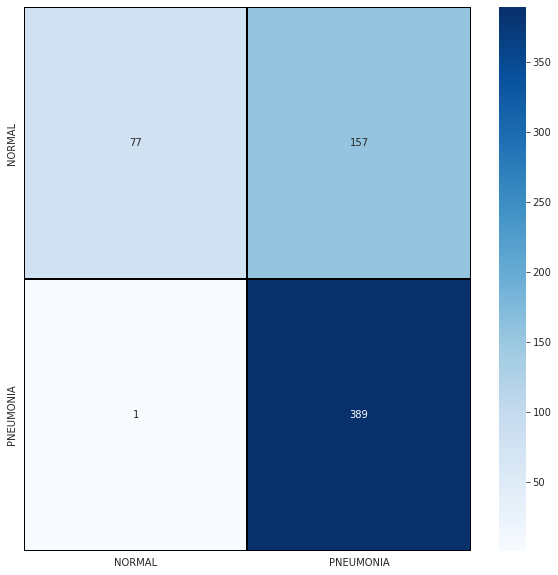

In [105]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black' ,
            linewidth = 1 ,
            annot = True,
            fmt='',
            xticklabels = labels,yticklabels = labels)

In [106]:
labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size,img_size))
    return new_array.reshape(-1 ,img_size,img_size, 1)

svm_model = tf.keras.models.load_model("svm.model") # load model

In [109]:
# extra pneumonia photo from google
prediction = svm_model.predict([prepare("/content/chest_xray/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg")])
print(labels[int(prediction[0])])



PNEUMONIA


In [110]:
# extra pneumonia photo from google
prediction = svm_model.predict([prepare("/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg")])
print(labels[int(prediction[0])])

NORMAL


#**KNN**

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
import os

import matplotlib.pyplot as plt

In [112]:

image_size= 32

dir_base='/content/chest_xray'
test_dir = '{}/{}'.format(dir_base, 'test')
train_dir = '{}/{}'.format(dir_base, 'train')
val_dir = '{}/{}'.format(dir_base, 'val')

test_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'test','NORMAL')
train_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'train','NORMAL')
val_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'val','NORMAL')

test_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'test','PNEUMONIA')
train_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'train','PNEUMONIA')
val_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'val','PNEUMONIA')





In [113]:
def get_data(path,label,data_type,process_flipped):
  result = []
  items = os.listdir(path)
  for i in items:
    img_path = '{}/{}/{}/{}'.format(dir_base,data_type,label,i)
    result.append((get_image_arr(img_path),label))
    if process_flipped == True:
      result.append((get_flipped_image_arr(img_path),label))
  return pd.DataFrame(result, columns=['image', 'label'],index=None)

In [114]:
def get_flipped_image_arr(path):
  original = cv2.imread(path) 
  img = cv2.flip(original, 1)
  img = cv2.resize(img, (image_size, image_size),interpolation = cv2.INTER_AREA).reshape(1,-1)
  return img

In [115]:
def get_image_arr(path):
  img = cv2.imread(path) 
  img = cv2.resize(img, (image_size, image_size),interpolation = cv2.INTER_AREA).reshape(1,-1)
  return img

In [116]:
def show_plot(k_values,accuracy_values):
  fig = plt.figure()
  fig.subplots_adjust(top=0.8)
  ax1 = fig.add_subplot()
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('K value')
  plt.plot(k_values,accuracy_values,label='Accuracy for k params')
  plt.scatter(k_values,accuracy_values,c=k_values,alpha=1)
  plt.legend()
  plt.show()

In [117]:


def show_confusion_matrix(model,x,y):
  disp = plot_confusion_matrix(model, x, y,
                               cmap=plt.cm.Blues,
                               normalize= None, values_format = '.2f')
  plt.show()



In [118]:
data_normal = get_data(train_dir_normal_cases,'NORMAL','train',True)
data_pneumonia = get_data(train_dir_pneumonia_cases,'PNEUMONIA','train',False)


In [119]:
data = pd.concat([data_normal,data_pneumonia])
images = data.image
y = data.label

X = []
for i in images.values:
    X.append(i[0])
X = np.array(X)

In [120]:


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.70,
                                                    random_state=30)
print('X train shape:',X_train.shape)
print('Y train shape:',y_train.shape)

print('X train shape:',X_test.shape)
print('Y train shape:',y_test.shape)


X train shape: (1967, 3072)
Y train shape: (1967,)
X train shape: (4590, 3072)
Y train shape: (4590,)


In [ ]:
k_values = [5,10,20]
accuracy_values = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions)
    accuracy_values.append(acc)
    print('Accuracy for k={}:'.format(str(k)),acc)
    print('\n')
    print(classification_report(y_test, predictions))
    print('=========================================================')
    print('\n')
show_plot(k_values,accuracy_values)


Accuracy for k=5: 0.9368191721132898


              precision    recall  f1-score   support

      NORMAL       0.95      0.89      0.92      1857
   PNEUMONIA       0.93      0.97      0.95      2733

    accuracy                           0.94      4590
   macro avg       0.94      0.93      0.93      4590
weighted avg       0.94      0.94      0.94      4590





In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X,y)

In [ ]:
#Load test data
test_data_normal = get_data(test_dir_normal_cases,'NORMAL','test',False)
test_data_pneumonia = get_data(test_dir_pneumonia_cases,'PNEUMONIA','test',False)

test_data_total = pd.concat([test_data_normal,test_data_pneumonia])

y_test_data = test_data_total.label

X_test_data = []
for i in test_data_total.image.values:
    X_test_data.append(i[0])
    
X_test_data = np.array(X_test_data)

In [ ]:


predictions_test = knn_model.predict(X_test_data)
acc_test = metrics.accuracy_score(y_test_data, predictions_test)
print('Accuracy for test',acc_test)
print(classification_report(y_test_data, predictions_test))
show_confusion_matrix(knn_model,X_test_data,y_test_data)



In [ ]:
print(predictions_test[:5])